# Quantify Clutter as a Regressor against Behavioral Data

Global clutter is defined here as the number of objects segmented in the image.

Local clutter is the number of objects segmented in a set radius around the target.

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import path 
from matplotlib import pyplot as plt
import json
from PIL import Image, ImageStat
from sklearn.linear_model import LinearRegression
from scipy import stats
import math

## Load Behavioral Data

In [2]:
# TAC_raw_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

TAC_raw_individual_trial_data_path  = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/TAC_npy_files/matchedVE/normalized/'

# stim 
with open(dpath + 'n_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

# with open(TAC_raw_individual_trial_data_path + 'final_stim_500.npy' , 'rb') as f:
#     stim_500 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'final_stim_750.npy' , 'rb') as f:
#     stim_750 = np.load(f, allow_pickle=True)

with open(dpath + 'n_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)

# x data
with open(dpath + 'n_X_250.npy' , 'rb') as f:
    X_250 = np.load(f, allow_pickle=True)

# with open(TAC_raw_individual_trial_data_path + 'X_500.npy' , 'rb') as f:
#     X_500 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'X_750.npy' , 'rb') as f:
#     X_750 = np.load(f, allow_pickle=True)

with open(dpath + 'n_X_1000.npy' , 'rb') as f:
    X_1000 = np.load(f, allow_pickle=True)

# y data 
with open(dpath + 'n_final_y_250.npy' , 'rb') as f:
    y_250 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'final_y_500.npy' , 'rb') as f:
#     y_500 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'final_y_750.npy' , 'rb') as f:
#     y_750 = np.load(f, allow_pickle=True)
    
with open(dpath + 'n_final_y_1000.npy' , 'rb') as f:
    y_1000= np.load(f, allow_pickle=True)

In [3]:
# TAC_raw_individual_trial_residuals_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_residuals/'

TAC_raw_individual_trial_residuals_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_residuals/'

# residuals
with open(TAC_raw_individual_trial_residuals_path + 'residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_residuals_path + 'residuals_500.npy' , 'rb') as f:
    residuals_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_residuals_path + 'residuals_750.npy' , 'rb') as f:
    residuals_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_residuals_path + 'residuals_1000.npy' , 'rb') as f:
    residuals_1000 = np.load(f, allow_pickle=True)

In [36]:
stimfolder_250 = [elem.split('/')[1][:-2] for elem in stim_250]
# stimfolder_500 = [elem.split('/')[1][:-2] for elem in stim_500]
# stimfolder_750 = [elem.split('/')[1][:-2] for elem in stim_750]
stimfolder_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]


## Global Clutter x Behavioral Data

In [6]:
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

In [21]:
globalClutter_dict = {}
for stim in os.listdir(stimuli_path):
    if 'resize' in stim:
        p = stimuli_path + '/' + stim + '/data.json'
        data = json.load(open(p))
        target_object = data['objects'][0]['name']
        dbID = data['objects'][0]['dbID']
        kp = kinect192_path + '/' + stim[:-2] + '/annotation2Dfinal'
        for file in os.listdir(kp):
            if 'objSA' in file:
                objSA = json.load(open(kp + '/' + file))
                # count how many objects there are in the scene
                # exclude floor and wall 
                count = 0
                for key in objSA:
                    if 'floor' in key: count += 0
                    if 'wall' in key: count += 0
                    else:
                        count += 1
                globalClutter_dict[stim[:-2]] = count

In [27]:
len(globalClutter_dict), len(stimfolder_250)

(140, 192)

In [43]:
import statistics

# fill in missing data with the average clutter for now 
all_cvals = []
for key in globalClutter_dict:
    cval = globalClutter_dict[key]
    all_cvals.append(cval)
    
np.mean(all_cvals), statistics.median(all_cvals)

(16.478571428571428, 14.0)

In [44]:
globalClutter = []
for folder in stimfolder_250:
    try:
        globalClutter.append(globalClutter_dict[folder])
    except:
        globalClutter.append(14)


In [45]:
# corr, p-value
print('Correlation between Linear Model Residuals and Global Clutter')
print('250 ms: ',stats.pearsonr(residuals_250, globalClutter))
print('500 ms: ',stats.pearsonr(residuals_500, globalClutter))
print('750 ms: ',stats.pearsonr(residuals_750, globalClutter))
print('1000 ms: ',stats.pearsonr(residuals_1000, globalClutter))

Correlation between Linear Model Residuals and Global Clutter
250 ms:  (0.05451215265063665, 0.45267145550823357)
500 ms:  (0.017884790590069203, 0.805511651509828)
750 ms:  (0.0008054150282515195, 0.9911538087152375)
1000 ms:  (0.1163531134566158, 0.10801672420236239)


In [46]:
# corr, p-value
print('Correlation between Estimated Depth and Global Clutter')
print('250 ms: ',stats.pearsonr(y_250, globalClutter))
print('1000 ms: ',stats.pearsonr(y_1000, globalClutter))

Correlation between Estimated Depth and Global Clutter
250 ms:  (0.037027863888574555, 0.6101231494247362)
1000 ms:  (0.03560209378719269, 0.623956163308392)


m: [0.00132218]
b: 0.9822567605936492
R-squared:  0.0012675090820317703


0.001

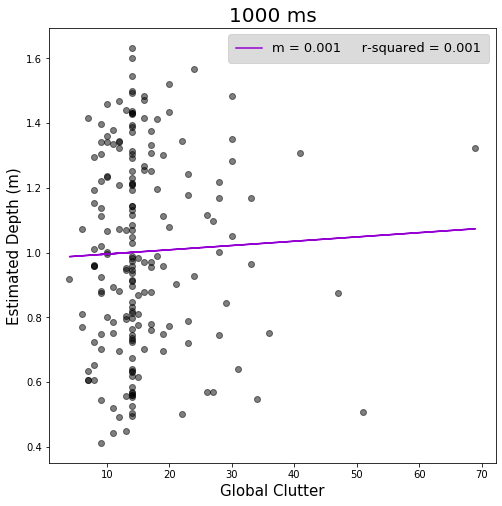

In [47]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(globalClutter).reshape(-1,1)
y = y_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Global Clutter", fontsize = 15)
plt.ylabel("Estimated Depth (m)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [0.0027834]
b: -0.0439979854477079
R-squared:  0.002971574786606368


0.003

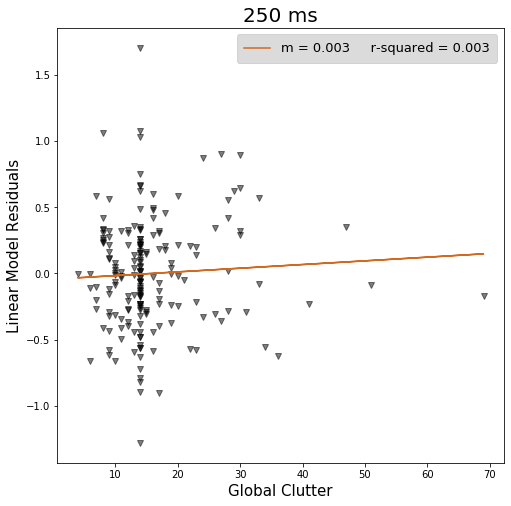

In [48]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(globalClutter).reshape(-1,1)
y = residuals_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5, marker = 'v');
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Global Clutter", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Local Clutter x Behavioral Data 

In [50]:
def getTargetLocation(stimfolder, rootdir):
    """
    imagepath = target folder 
    rootdir = main folder of all target folders (NOT SUNRGBD folder)
    """
#     stimfolder = imagepath.split('/')[-2]
    jsonpath = rootdir + '/' + stimfolder + '/data.json'
    
    # Opening JSON file
    f = open(jsonpath,)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)
    crossing_point = data['objects'][0]['crossing_point']
    # x, y is a misnomer for array indeces 
    # x value = 364 (verticel midline of image aka column index)
    x = crossing_point[0]['x']
    # y value - row index 
    y = crossing_point[0]['y']
    row_index = y
    col_index = x
    return (row_index,col_index)
    

In [51]:
final_stimuli = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

stimuli = []

for folder in os.listdir(final_stimuli):
    if 'resize' in folder:
        stimuli.append(folder)

In [52]:

target_coords = [getTargetLocation(path, final_stimuli) for path in stimuli]


In [53]:
stimuli[0], target_coords[0]

('000866_2014-06-09_20-45-42_260595134347_rgbf000139-resize_1',
 (91.40339449541284, 364))

In [54]:
def points_in_circle_np(radius, x0=0, y0=0, ):
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    # x, y = np.where((np.hypot((x_-x0)[:,np.newaxis], y_-y0)<= radius)) # alternative implementation
    for x, y in zip(x_[x], y_[y]):
        yield x, y